In [19]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [2]:
# reading dataset
df=pd.read_csv("C:/Users/manish arram/Desktop/ASS/3 SEM/Business Intelligence & Data Analytics/session1/Assignment/data analysis/Crop recomendation/Crop_Recommendation.csv")
df1=df.copy()

In [4]:
# checking null values
print('NULL Values in each column :')
df1.isnull().sum()

NULL Values in each column :


Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
# Summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
#description of data
df1.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

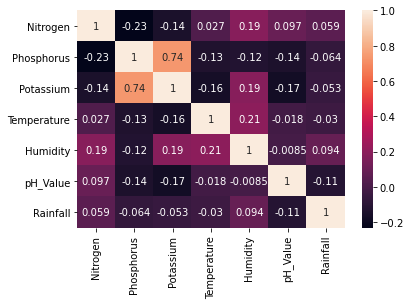

In [7]:
# correlation matrix for easy visualization of the relationship between the features in the data.
sns.heatmap(df1.corr(),annot=True)

In [10]:
# unique values in categorical variables
print("unique values in ""Crop column"":", df1['Crop'].unique())

# no.of unique values in categorical variables
print("unique values in ""Crop column"":", df1['Crop'].nunique())

unique values in Crop column: ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']
unique values in Crop column: 22


In [14]:
# converting of categorical variables into numerical representations by LabelEncoder because there are many unique values
df1.Crop = LabelEncoder().fit_transform(df1.Crop)


In [20]:
# Split Dependent and independent variables
X = df1.drop('Crop', axis=1)
y = df1['Crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)
y_pred_lr = lr_classifier.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Print accuracy and classification report for each model
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Naive Bayes Classifier Report:\n", nb_report)

print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Report:\n", lr_report)

print("\nDecision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Report:\n", dt_report)


Naive Bayes Classifier Accuracy: 0.9954545454545455
Naive Bayes Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        